# Custom object Detection




* Gather a dataset of images from internet. 
* label our dataset using roboflow 
[Dataset link](https://drive.google.com/drive/folders/1j5LvySTAcE8xxlN_Wi3v49Clk-5q72-M?usp=share_link):
* Convert an dataset to YOLOv5 format.
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work


Clone yolov5 github repository

In [7]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14166, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 14166 (delta 64), reused 84 (delta 51), pack-reused 14060
Receiving objects: 100% (14166/14166), 13.54 MiB | 9.95 MiB/s, done.
Resolving deltas: 100% (9727/9727), done.


In [8]:
%cd yolov5/


/content/yolov5


Install all the requirements

In [9]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 36.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 52.7 MB/s 


Before training 
* Changed the coco128.yaml file
* Changed the path to the dataset root path, train path, validation path
* Changed label name

# Train our custom yolo model
* Here we select YOLOv5s, the second-smallest and fastest model
* Training for 200 epoch

In [10]:
!python train.py --img 416 --batch 16 --epochs 200 --data coco128.yaml --weights '' --cfg yolov5s.yaml --nosave --cache

train: weights=, cfg=yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

* Retraining model for more 400 epoch to get better MAP.


In [11]:
!python train.py --weights /content/yolov5/runs/train/exp/weights/last.pt --epochs 400 --img 416

train: weights=/content/yolov5/runs/train/exp/weights/last.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma

Running inference with a pretrained checkpoint on image outside the dataset.

In [14]:
!python detect.py --source /images.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/images.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /images.jpg: 416x320 1 QRcode, 10.4ms
Speed: 0.3ms pre-process, 10.4ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels


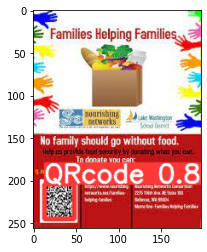

In [15]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
image = mpimg.imread("/content/yolov5/runs/detect/exp/images.jpg")
plt.imshow(image)
plt.show()

In [17]:
!python detect.py --source /test1.jpg --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 416 --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/test1.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /test1.jpg: 224x416 1 QRcode, 11.6ms
Speed: 0.3ms pre-process, 11.6ms inference, 1.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp2/labels


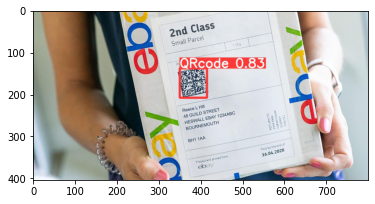

In [18]:
image = mpimg.imread("/content/yolov5/runs/detect/exp2/test1.jpg")
plt.imshow(image)
plt.show()

#Results

In [ ]:
!pip install prettytable

In [23]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Batch size", "epoch", "map50"]
x.add_row(["YOLOv5",16,200,0.53])
x.add_row(["YOLOv5 retrianed",16,600,0.83])
print(x)

+------------------+------------+-------+-------+
|      Model       | Batch size | epoch | map50 |
+------------------+------------+-------+-------+
|      YOLOv5      |     16     |  200  |  0.53 |
| YOLOv5 retrianed |     16     |  600  |  0.83 |
+------------------+------------+-------+-------+


* Here we are not getting good accuracy because of the Quality of the images.
* The images are downloaded from internet so did not get good Quality images.
* The number images are less that why we are not getting much accuracy.
* Here we are training only 48 images.
* for better accuracy we need more images with good quality images. 